In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# TRAIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/train.csv")
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [2]:
train.sort_values('image_name',ascending=True,inplace=True)
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33126 entries, 1 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.3+ MB


In [4]:
train['sex'].fillna(train['sex'].mode()[0],inplace=True)
train['age_approx'].fillna(train['age_approx'].mean(),inplace=True)
train['anatom_site_general_challenge'].fillna(train['anatom_site_general_challenge'].mode()[0],inplace=True)

In [5]:
train.anatom_site_general_challenge.value_counts()

torso              17372
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64

In [6]:
corr = train.corr()
corr.style.background_gradient(cmap='inferno')

,age_approx,target
age_approx,1.000000,0.086386
target,0.086386,1.000000


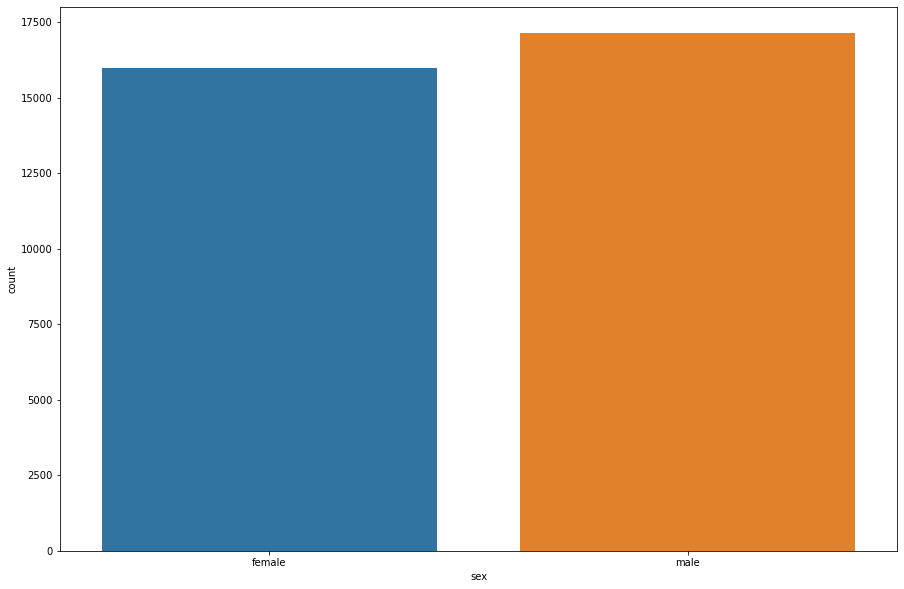

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(train.sex)

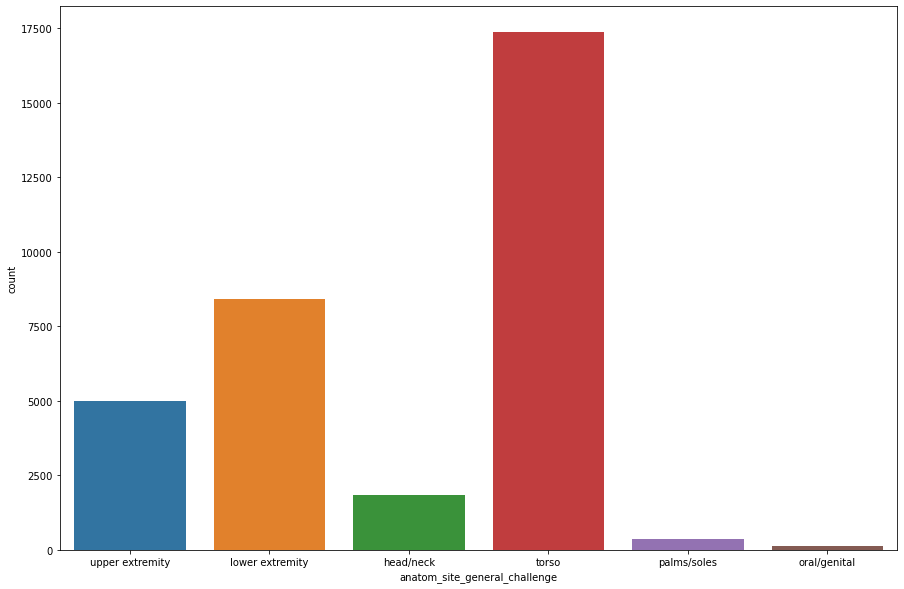

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(train.anatom_site_general_challenge)

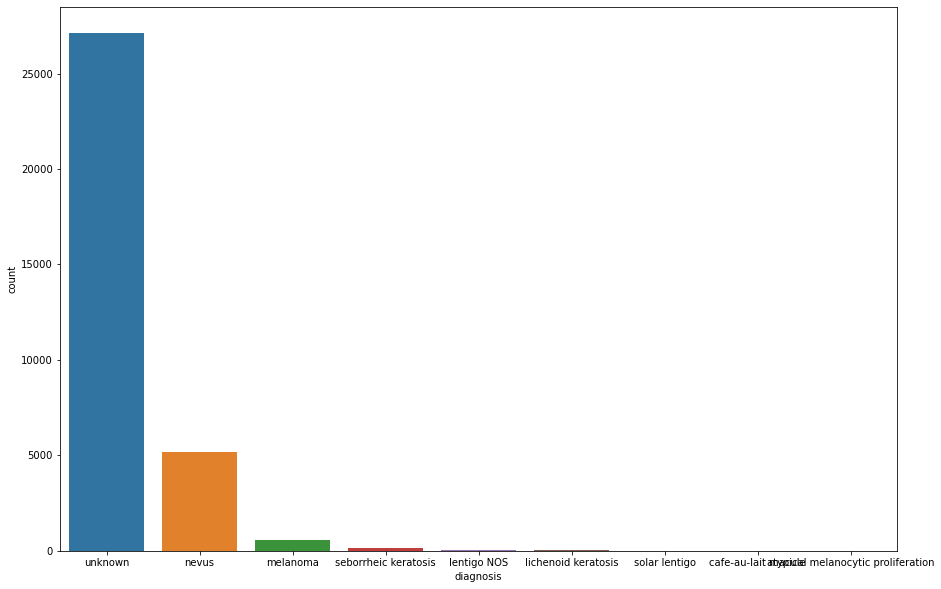

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(train.diagnosis)

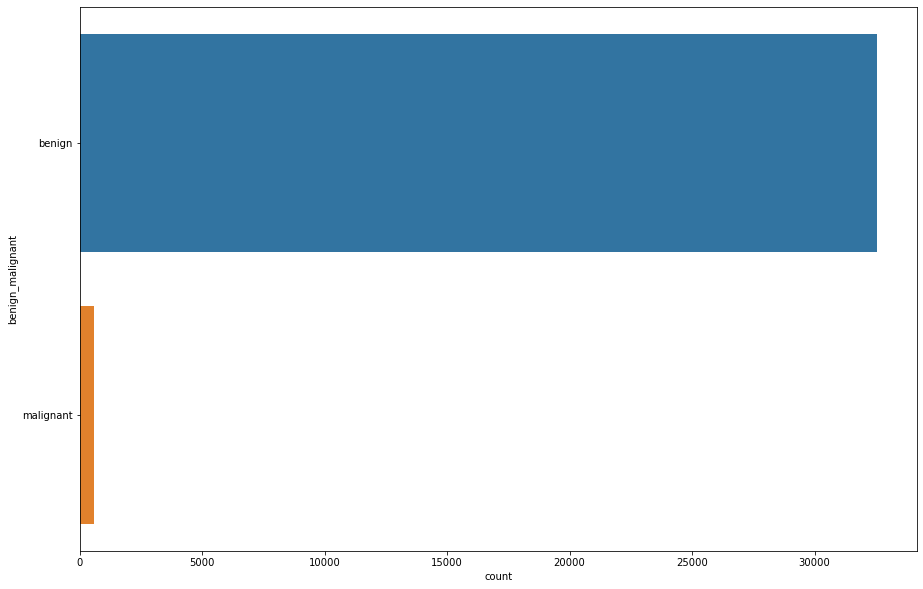

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(y="benign_malignant",data=train)

# Deep Learning

In [11]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0


In [12]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
labels=lab.fit_transform(train.benign_malignant)

In [13]:
import glob
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm
image_array=[]
l=[]
i=0
for img in tqdm(glob.glob("../input/siim-isic-melanoma-classification/jpeg/train/*.jpg")):
    image= cv2.imread(img)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((50,50))
    image_array.append(np.array(size_image))
    i=i+1
    if i==1000:
        break

  3%|▎         | 999/33126 [03:24<1:49:44,  4.88it/s]


In [14]:
len(image_array)

1000

In [15]:
data=np.array(image_array)
labels=labels[:1000]

In [16]:
len(labels),np.unique(labels)

(1000, array([0, 1]))

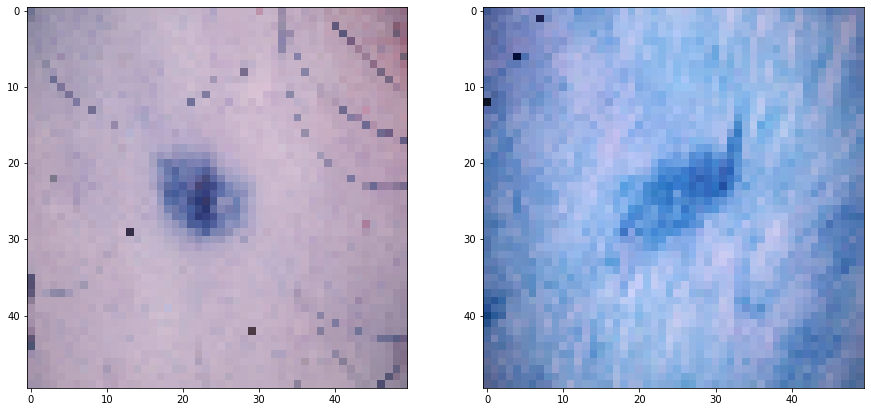

In [17]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(15,10))
ax=figure.add_subplot(121)
ax.imshow(data[0])
bx=figure.add_subplot(122)
bx.imshow(data[60])
plt.show()

In [18]:
np.save("Cells",data)
np.save("labels",labels)

In [19]:
Cells=np.load("Cells.npy")
labels=np.load("labels.npy")

In [20]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [21]:
num_classes=len(np.unique(labels))
len_data=len(Cells)
num_classes

2

In [22]:
x_train,x_test=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [23]:
y_train,y_test=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [24]:
import keras
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

Using TensorFlow backend.


In [25]:
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.applications.resnet50 import ResNet50

In [26]:
base_model = ResNet50(weights='imagenet',include_top=False, input_shape=(50,50,3))
x = base_model.output
x = Flatten()(x)
x=Dense(500, activation='relu')(x)
x=Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.summary()

/opt/conda/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 7s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 56, 56, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 25, 25, 64)   256         conv1[0][0]                      
___________________________

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
history=model.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_split=0.33,callbacks=[checkpoint])

Train on 602 samples, validate on 298 samples
Epoch 1/20
602/602 [==============================] - 7s 12ms/step - loss: 1.6973 - accuracy: 0.8389 - val_loss: 0.3202 - val_accuracy: 0.9799

Epoch 00001: loss improved from inf to 1.69731, saving model to weights.hdf5
Epoch 2/20
602/602 [==============================] - 0s 468us/step - loss: 2.4490 - accuracy: 0.9834 - val_loss: 0.3805 - val_accuracy: 0.9799

Epoch 00002: loss did not improve from 1.69731
Epoch 3/20
602/602 [==============================] - 0s 459us/step - loss: 1.8089 - accuracy: 0.9834 - val_loss: 0.3438 - val_accuracy: 0.9799

Epoch 00003: loss did not improve from 1.69731
Epoch 4/20
602/602 [==============================] - 0s 448us/step - loss: 0.6166 - accuracy: 0.9834 - val_loss: 0.3012 - val_accuracy: 0.9799

Epoch 00004: loss improved from 1.69731 to 0.61658, saving model to weights.hdf5
Epoch 5/20
602/602 [==============================] - 0s 478us/step - loss: 0.1449 - accuracy: 0.9834 - val_loss: 0.2628 - 

In [29]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

100/100 [==============================] - 0s 3ms/step
Test loss: 0.10398428533837432
Test accuracy: 0.9900000095367432


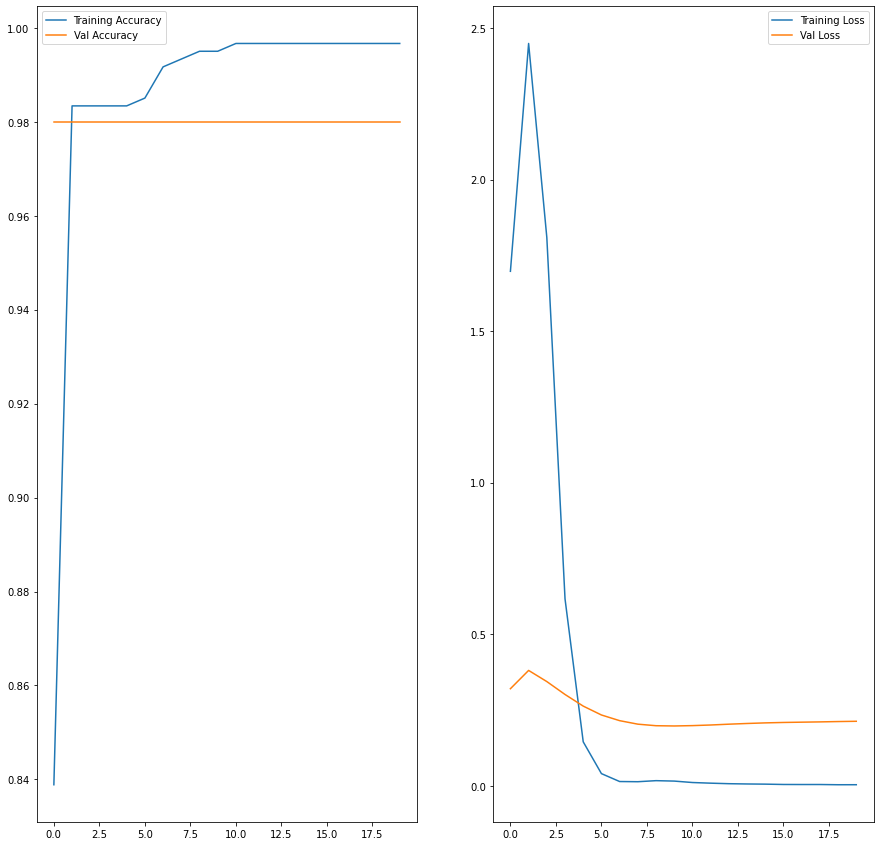

In [30]:
figure=plt.figure(figsize=(15,15))
ax=figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx=figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

In [ ]:
test_image_array=[]
for img in tqdm(glob.glob("../input/siim-isic-melanoma-classification/jpeg/test/*.jpg")):
    image= cv2.imread(img)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((50,50))
    test_image_array.append(np.array(size_image))
np.save("test",test_image_array)

In [31]:
ts_array=np.load("../input/siimpred/test.npy")
p=np.argmax(model.predict(ts_array),axis=1)

In [32]:
a=lab.inverse_transform(p)
a=pd.DataFrame(a)

In [33]:
a.to_csv("benign_malignant.csv",index=False)

# Machine Learning

In [34]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
train['benign_malignant']=la.fit_transform(train['benign_malignant'])
train['diagnosis']=la.fit_transform(train['diagnosis'])
train['anatom_site_general_challenge']=la.fit_transform(train['anatom_site_general_challenge'])
train['sex']=la.fit_transform(train['sex'])

In [35]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
1,ISIC_0015719,IP_3075186,0,45.0,5,8,0,0
2,ISIC_0052212,IP_2842074,0,50.0,1,5,0,0
3,ISIC_0068279,IP_6890425,0,45.0,0,8,0,0
4,ISIC_0074268,IP_8723313,0,55.0,5,8,0,0
5,ISIC_0074311,IP_2950485,0,40.0,1,8,0,0


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33126 entries, 1 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33126 non-null  int64  
 3   age_approx                     33126 non-null  float64
 4   anatom_site_general_challenge  33126 non-null  int64  
 5   diagnosis                      33126 non-null  int64  
 6   benign_malignant               33126 non-null  int64  
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.5+ MB


In [37]:
x=train.drop(['image_name','patient_id','target','diagnosis'],axis=1)
y=train['target']

In [38]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_sample(x,y)

# Machine Learning

In [39]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
xr,xt,yr,yt=train_test_split(x,y)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRFRegressor,XGBRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor,LGBMRegressor

In [41]:
model=XGBClassifier(n_estimators=1000)
model.fit(x,y)
# kfold=KFold(n_splits=10)
# res=cross_val_score(model,x,y,cv=kfold)
# res.mean()*100

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
yp=model.predict(xt)

In [43]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(r2_score(yt,yp))
print(mean_absolute_error(yt,yp))
print(mean_squared_error(yt,yp))

1.0
0.0
0.0


In [44]:
sample=pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/sample_submission.csv")
sample.head()

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0
3,ISIC_0073313,0
4,ISIC_0073502,0


# TEST

In [45]:
test=pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/test.csv")
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [46]:
test['sex'].fillna(test['sex'].mode()[0],inplace=True)
test['age_approx'].fillna(test['age_approx'].mean(),inplace=True)
test['anatom_site_general_challenge'].fillna(test['anatom_site_general_challenge'].mode()[0],inplace=True)

In [47]:
test['anatom_site_general_challenge']=la.fit_transform(test['anatom_site_general_challenge'])
test['sex']=la.fit_transform(test['sex'])

In [48]:
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,1,70.0,4
1,ISIC_0052349,IP_7782715,1,40.0,1
2,ISIC_0058510,IP_7960270,0,55.0,4
3,ISIC_0073313,IP_6375035,0,50.0,4
4,ISIC_0073502,IP_0589375,0,45.0,1


In [49]:
test=pd.concat([test,a],axis=1)
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,0
0,ISIC_0052060,IP_3579794,1,70.0,4,malignant
1,ISIC_0052349,IP_7782715,1,40.0,1,benign
2,ISIC_0058510,IP_7960270,0,55.0,4,benign
3,ISIC_0073313,IP_6375035,0,50.0,4,benign
4,ISIC_0073502,IP_0589375,0,45.0,1,benign


In [50]:
test.columns=[                   'image_name',                    'patient_id',
                                 'sex',                    'age_approx',
       'anatom_site_general_challenge',                               'benign_malignant']

In [51]:
test['benign_malignant']=la.fit_transform(test['benign_malignant'])

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  int64  
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10982 non-null  int64  
 5   benign_malignant               10982 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 514.9+ KB


In [53]:
x1=test.drop(['image_name','patient_id'],axis=1)
yp1=model.predict(x1)
yp1=pd.DataFrame(yp1)

In [54]:
test=pd.concat([test,yp1],axis=1)
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,benign_malignant,0
0,ISIC_0052060,IP_3579794,1,70.0,4,1,1
1,ISIC_0052349,IP_7782715,1,40.0,1,0,0
2,ISIC_0058510,IP_7960270,0,55.0,4,0,0
3,ISIC_0073313,IP_6375035,0,50.0,4,0,0
4,ISIC_0073502,IP_0589375,0,45.0,1,0,0


In [55]:
test.columns=[                   'image_name',                    'patient_id',
                                 'sex',                    'age_approx',
       'anatom_site_general_challenge',              'benign_malignant',
                                     'target']

In [56]:
test.to_csv('sub.csv',columns=['image_name','target'],index=False)